In [1]:
import numpy as np
import numba as nb

In [2]:
n_grid = 200

grid = np.random.rand(3, n_grid, n_grid)

In [3]:
@nb.jit()
def meanGrid(grid):
    mGrid = np.zeros_like(grid)
    for i in range(n_grid):
        for j in range(n_grid):
            for k in range(3):
                
                i0 = (i-1)%n_grid
                i2 = (i+1)%n_grid
                j0 = (j-1)%n_grid
                j2 = (j+1)%n_grid
                
                r1 = grid[k,i0,j0] + grid[k,i,j0] + grid[k,i2,j0]
                r2 = grid[k,i0,j] + grid[k,i,j] + grid[k,i2,j]
                r3 = grid[k,i0,j2] + grid[k,i,j2] + grid[k,i2,j2]
                mean = 1/9*(r1 + r2 + r3)
                mGrid[k,i,j] = mean

                
    return mGrid
                

In [4]:
@nb.jit()
def update(mGrid):
    mGrid[0] = mgrid[0] * (1 + a * mgrid[1] - c * mgrid[2])
    mGrid[1] = mgrid[1] * (1 + b * mgrid[2] - a * mgrid[0])
    mGrid[2] = mgrid[2] * (1 + c * mgrid[0] - b * mgrid[1])
    return mGrid

In [5]:
n_steps = 100
a, b, c = (1,1,1)

In [8]:
%matplotlib TkAgg

KeyError: 'tkagg'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
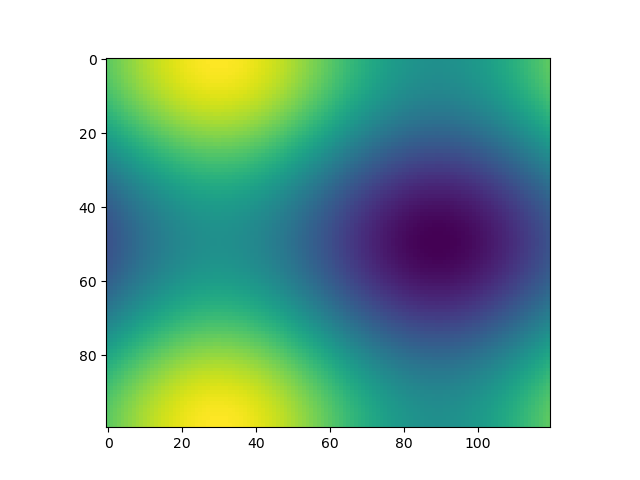

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()